In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

# Load Data 

In [3]:
df = pd.read_excel("../dataset/dataset-uci.xlsx", sheet_name='Sheet1').reset_index()

# dataset source and documentation can be found at https://archive.ics.uci.edu/dataset/1150/gallstone-1 

In [4]:
df.columns = ['ID', 'gallstoneStatus', 'age', 'gender', 'comorbidity', 'coroaryArtDisease', 'hypothyromidism',
              'hyperlipiidemia', 'diabetes', 'height', 'weight', 'bmi', 'totalBodyWater', 'extracellularWater',
              'intracellularWater', 'extracellularFluid', 'totalBodyFatRatio%', 'leanMass%', 'protein%',
              'visceralFatRat', 'boneMass', 'muscleMass', 'obesity%', 'totalFat', 'visceralFatArea', 
              'visceralMuscleArea', 'hepaticFatAcc', 'glucose', 'TC', 'LDL', 'HDL', 'triglyceride', 
              'AST', 'ALT', 'ALP', 'creatinine', 'GFR', 'reactiveProtein', 'hemoglobin', 'vitaminD']

In [5]:
df['genderSimplified'] = df['gender'].apply(lambda x: 'female' if x == 1 else 'male')
df['gallstoneIncidence'] = df['gallstoneStatus'].apply(lambda x: x == 1)
df['comordbiditySimplified'] = df['comorbidity'].apply(lambda x: x == 1)

In [6]:
df.shape

(319, 43)

In [7]:
df.isnull().sum()

ID                        0
gallstoneStatus           0
age                       0
gender                    0
comorbidity               0
coroaryArtDisease         0
hypothyromidism           0
hyperlipiidemia           0
diabetes                  0
height                    0
weight                    0
bmi                       0
totalBodyWater            0
extracellularWater        0
intracellularWater        0
extracellularFluid        0
totalBodyFatRatio%        0
leanMass%                 0
protein%                  0
visceralFatRat            0
boneMass                  0
muscleMass                0
obesity%                  0
totalFat                  0
visceralFatArea           0
visceralMuscleArea        0
hepaticFatAcc             0
glucose                   0
TC                        0
LDL                       0
HDL                       0
triglyceride              0
AST                       0
ALT                       0
ALP                       0
creatinine          

# Descriptive Stats Stuff

In [8]:
patientSumm = ['age', 'height', 'weight', 'bmi' , 'obesity%']

df[patientSumm].describe().T

,count,mean,std,min,25%,50%,75%,max
age,319.0,48.068966,12.114558,20.0,38.50,49.0,56.00,96.0
height,319.0,167.156740,10.053030,145.0,159.50,168.0,175.00,191.0
weight,319.0,80.564890,15.709069,42.9,69.60,78.8,91.25,143.5
bmi,319.0,28.877116,5.313707,17.4,25.25,28.3,31.85,49.7
obesity%,319.0,35.850125,109.799718,0.4,13.90,25.6,41.75,1954.0


In [9]:
df['gallstoneIncidence'].value_counts()

gallstoneIncidence
False    161
True     158
Name: count, dtype: int64

In [10]:
df.groupby(by=['gallstoneIncidence', 'genderSimplified'])['ID'].count()

gallstoneIncidence  genderSimplified
False               female              67
                    male                94
True                female              90
                    male                68
Name: ID, dtype: int64

### Is There an Association Between Patient Demographics and Gallstone Incidence? 

##### Gender

In [11]:
gender_gall = stats.fisher_exact(pd.crosstab(df['gallstoneStatus'], df['gender']))
gender_gall.statistic, gender_gall.pvalue

(np.float64(1.8568920105355575), np.float64(0.007195029358147645))

##### Height, Weight, Age, BMI, obesity

In [12]:
gallstone_summ_stat = { patient: stats.spearmanr(df[patient], df['gallstoneStatus']) for patient in patientSumm }
gallstone_summ_stat = [(item, gallstone) for item, gallstone in gallstone_summ_stat.items()]
gallstone_summ_stat

[('age',
  SignificanceResult(statistic=np.float64(0.04264314616421671), pvalue=np.float64(0.4478606826300362))),
 ('height',
  SignificanceResult(statistic=np.float64(-0.12100414394945586), pvalue=np.float64(0.030721273922701017))),
 ('weight',
  SignificanceResult(statistic=np.float64(0.051167433182639964), pvalue=np.float64(0.3623539234091636))),
 ('bmi',
  SignificanceResult(statistic=np.float64(0.12113140932311382), pvalue=np.float64(0.030544738979242862))),
 ('obesity%',
  SignificanceResult(statistic=np.float64(-0.003131991330908795), pvalue=np.float64(0.9555651080770513)))]

In [13]:
df.groupby(by=['gallstoneIncidence'])['bmi'].mean()

gallstoneIncidence
False    28.238509
True     29.527848
Name: bmi, dtype: float64

In [14]:
df.groupby(by=['gallstoneIncidence'])['height'].mean()

gallstoneIncidence
False    168.229814
True     166.063291
Name: height, dtype: float64

### Do those with comordibidies have more gallstone 

In [15]:
comordbid_gals = stats.mannwhitneyu(df[df['comordbiditySimplified'] == True]['gallstoneStatus'], df[df['comordbiditySimplified'] == False]['gallstoneStatus'])
comordbid_gals.statistic, comordbid_gals.pvalue

(np.float64(10884.5), np.float64(0.9939552402033391))

# Results 

In [16]:
df_lab = ['glucose', 'TC', 'LDL', 'HDL', 'triglyceride', 'AST', 'ALP', 'creatinine', 'GFR', 'reactiveProtein', 
          'hemoglobin', 'vitaminD']

df_bioimpend = ['totalBodyWater', 'extracellularWater', 'intracellularWater', 'extracellularFluid',
                'totalBodyFatRatio%', 'leanMass%', 'protein%', 'visceralFatRat', 'boneMass', 'muscleMass',
                'obesity%', 'totalFat', 'visceralFatArea', 'visceralMuscleArea', 'hepaticFatAcc']

df_demographs = ['gallstoneStatus', 'gender', 'age', 'coroaryArtDisease', 'diabetes', 'bmi',
                 'height', 'hyperlipiidemia', 'hypothyromidism', 'weight', 'comorbidity']

df_results = df_lab + df_bioimpend + df_demographs

df_results = df[df_results]


In [17]:
df_results

,glucose,TC,LDL,HDL,triglyceride,AST,ALP,creatinine,GFR,reactiveProtein,...,gender,age,coroaryArtDisease,diabetes,bmi,height,hyperlipiidemia,hypothyromidism,weight,comorbidity
0,102.0,250.0,175.0,40.0,134.0,20.0,87.0,0.82,112.47,0.0,...,0,50,0,0,27.1,185,0,0,92.8,0
1,94.0,172.0,108.0,43.0,103.0,14.0,46.0,0.87,107.10,0.0,...,0,47,0,0,30.5,176,0,0,94.5,1
2,103.0,179.0,124.0,43.0,69.0,18.0,66.0,1.25,65.51,0.0,...,0,61,0,0,31.2,171,0,0,91.1,0
3,69.0,173.0,73.0,59.0,53.0,20.0,34.0,1.02,94.10,0.0,...,0,41,0,0,24.0,168,0,0,67.7,0
4,109.0,205.0,154.0,30.0,326.0,27.0,71.0,0.82,112.47,0.0,...,0,42,0,0,28.3,178,0,0,89.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,129.0,178.0,113.0,55.0,81.0,28.0,90.0,0.98,94.50,6.2,...,0,49,0,0,28.0,178,0,0,88.8,0
315,96.0,176.0,99.0,58.0,64.0,24.0,38.0,0.50,128.50,0.0,...,1,31,0,0,21.7,157,0,0,53.4,0
316,122.0,228.0,153.0,45.0,168.0,21.0,94.0,1.04,83.23,0.0,...,0,58,0,0,32.7,172,0,0,96.6,0
317,96.0,227.0,159.0,33.0,253.0,40.0,115.0,1.01,98.23,0.4,...,1,37,0,0,28.2,177,0,0,88.4,0


### Which features overall are most important for gallstone?

In [18]:
#Note that paper methodology doesn't implement splitting prior to anova feat selection

In [19]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

In [20]:
X = df_results.drop(columns=['gallstoneStatus'])
Y = df_results['gallstoneStatus']

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3, random_state=42)

In [21]:
def featuresResults(X, Y, method='old'):
    fscore, pval = f_classif(X, Y)

    if method == 'old':
        features = pd.DataFrame({'fScore': fscore, 'p-value': pval}, index=X.columns)
        features = features[features['fScore'] > 0.70]
  
    elif method =='new':
        features = pd.DataFrame({'fScore': fscore, 'p-value': pval}, index=X.columns)
        features = features[features['fScore'] > 2] # values with ok staf sig 

    else:
        raise Exception('not implementeeed')
    
    return features.sort_values(by=['fScore'], ascending=False).reset_index()

df_featuresResults = featuresResults(Xtrain, Ytrain, method='old')
df_featuresResults 

,index,fScore,p-value
0,vitaminD,25.275755,0.000001
1,reactiveProtein,15.978928,0.000087
2,boneMass,14.945238,0.000146
3,hemoglobin,13.644494,0.000278
4,extracellularWater,10.882063,0.001132
5,extracellularFluid,7.927943,0.005308
6,HDL,7.003220,0.008721
7,gender,6.267352,0.013021
8,hyperlipiidemia,6.226669,0.013315
9,totalBodyFatRatio%,5.910276,0.015850


In [22]:
fscore, pvalue = f_classif(Xtrain, Ytrain)

df_results.shape

(319, 38)

In [23]:
fscores = pd.Series(fscore, index=Xtrain.columns)
features = fscores[fscores > 0.70]
features = features.sort_values(ascending=False)
features 

vitaminD              25.275755
reactiveProtein       15.978928
boneMass              14.945238
hemoglobin            13.644494
extracellularWater    10.882063
extracellularFluid     7.927943
HDL                    7.003220
gender                 6.267352
hyperlipiidemia        6.226669
totalBodyFatRatio%     5.910276
leanMass%              5.909446
creatinine             5.554153
totalBodyWater         5.496420
muscleMass             4.370901
AST                    3.883265
visceralMuscleArea     2.924792
comorbidity            2.380052
triglyceride           2.300982
ALP                    2.274790
height                 2.181929
totalFat               1.782059
obesity%               1.771478
protein%               1.319335
visceralFatRat         1.108358
coroaryArtDisease      1.065820
glucose                0.999506
diabetes               0.935591
visceralFatArea        0.868278
dtype: float64

### Features Correlation Matrix Heatmap  

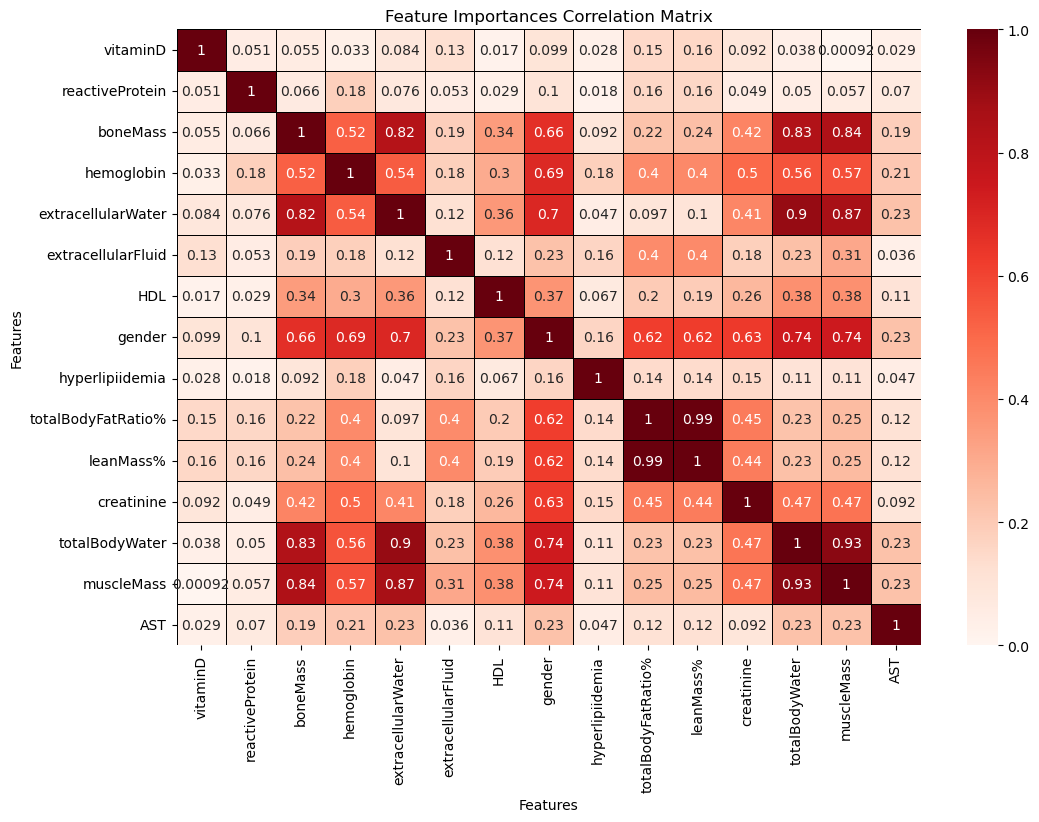

In [34]:
df_featuresResultsHM = df_featuresResults.sort_values(by=['fScore'], ascending=False).head(15)

corr_matrix = df_results[df_featuresResultsHM['index']].corr().abs()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Reds', vmin=0, vmax=1, linewidths=0.5, linecolor='black')
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Feature Importances Correlation Matrix')
plt.show()

### Which features in lab data are more important?

In [25]:
df_labResults = df_lab + df_demographs
df_labResults = df_results[df_labResults]

In [26]:
Xlab = df_labResults.drop(columns=['gallstoneStatus'])
Ylab = df_labResults['gallstoneStatus']

XlabTrain, Xlabtest, YlabTrain, YlabTest = train_test_split(Xlab, Ylab, test_size=0.3, random_state=30)

In [27]:
def featuresLab(X, Y, method='old'):
    fscoreLab, pval = f_classif(X, Y)

    if method == 'old':
        features = pd.DataFrame({'fScore': fscoreLab, 'p-value': pval}, index=X.columns)
        features = features[features['fScore'] > 0.70]
  
    elif method =='new':
        features = pd.DataFrame({'fScore': fscoreLab, 'p-value': pval}, index=X.columns)
        features = features[features['fScore'] > 2] # values with ok staf sig 

    else:
        raise Exception('not implementeeed')
    
    return features.sort_values(by=['fScore'], ascending=False).reset_index()

df_featuresLab = featuresLab(XlabTrain, YlabTrain, method='new')
df_featuresLab

,index,fScore,p-value
0,vitaminD,36.220134,7.251193e-09
1,reactiveProtein,15.591825,1.056737e-04
2,hemoglobin,11.045096,1.040712e-03
3,HDL,7.241491,7.668418e-03
4,gender,6.991558,8.776612e-03
5,ALP,5.913373,1.582257e-02
6,creatinine,5.368904,2.141423e-02
7,diabetes,4.464304,3.573218e-02
8,height,3.962037,4.776942e-02
9,hyperlipiidemia,3.856987,5.079294e-02


### Features Correlation Matrix Heatmap

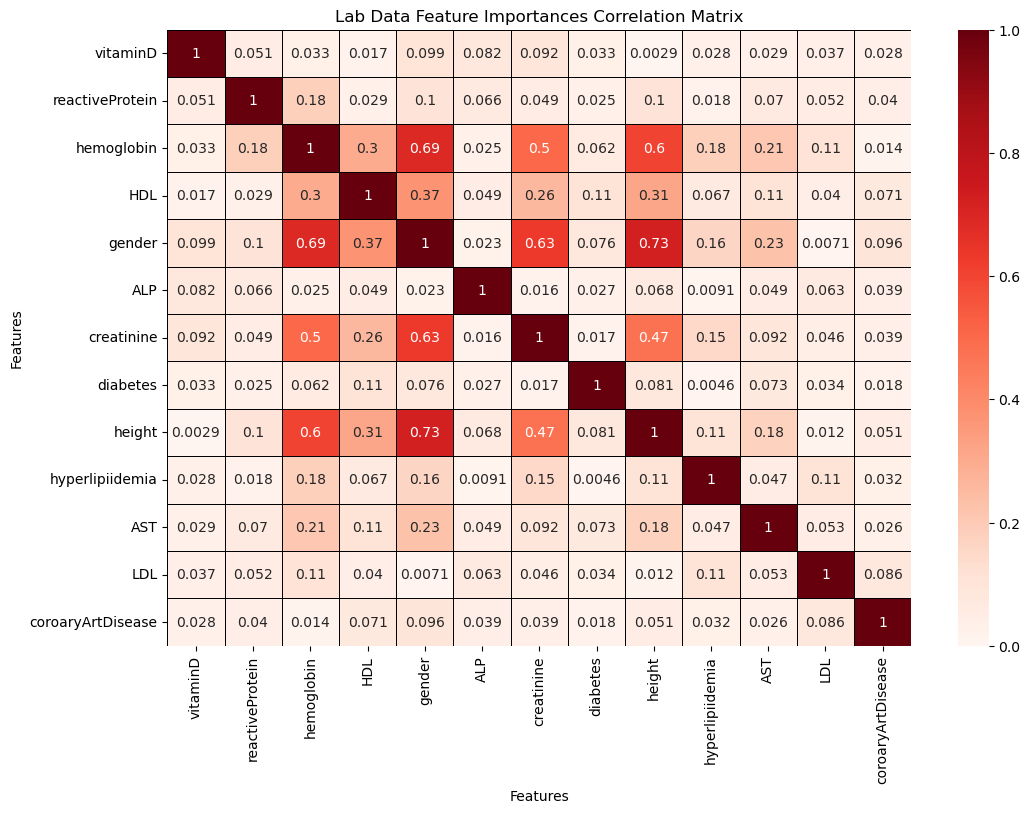

In [28]:
df_featuresLabHM = df_featuresLab.sort_values(by=['fScore'], ascending=False)

corr_matrix = df_results[df_featuresLabHM['index']].corr().abs()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Reds', vmin=0, vmax=1, linewidths=0.5, linecolor='black')
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Lab Data Feature Importances Correlation Matrix')
plt.show()

In [29]:
# save results to csv
    ## df_results.to_csv('df_results.csv')

# save results-main features to csv 
    ## featuresList = features.index.tolist()
    ## pd.Series(features).to_csv('fscore_features.csv')


In [30]:
#   save lab results to csv 
    ## dfLabs = X_lab.merge(Y_lab, left_index=True, right_index=True, how='left')
    ## pd.DataFrame(dfLabs).to_csv('df_lab.csv'